In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# A - 1&2

In [90]:
df = pd.read_excel(r'F:\darsi\401-02\Algorithem\Dr.Ghahremani\Tamrin\Data.xlsx')
df = df.drop(['weight','Unnamed: 25'], axis=1)

### PCA

In [91]:
# Seperate Data set

Class = df['class']
target_names = [0,1,2]
D = df.drop('class',axis=1)

In [92]:
# Mean Remove
D_bar = D - np.mean(D, axis=0) 

# Compute the covariance matrix
Cov_Matrix = np.dot(((1/len(D))* D_bar.T),D_bar)    

# EigenValues and EigenVectors
eig_values, eig_vectors = np.linalg.eig(Cov_Matrix)  

# Sort the value
sorted_indices = np.argsort(eig_values)[::-1]
sorted_eig_values = eig_values[sorted_indices]
sorted_eig_vectors = eig_vectors[:, sorted_indices]

#Dimension
d_prime = 2  

#Create Mtrix U
U = sorted_eig_vectors[:d_prime] 

#Reduce Dimention
D_prime = np.dot(D_bar,U.T) 

Text(0.5, 1.0, 'PCA-2D of Dataset ')

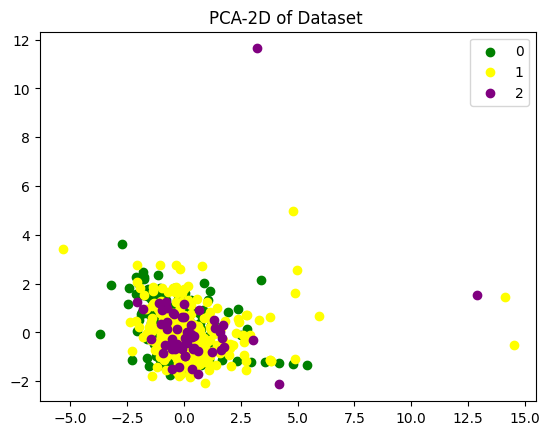

In [93]:
# Plot Data's Project
plt.figure()
colors = ['green', 'yellow', 'purple']
for color, i,j in zip(colors, [0, 1, 2],target_names):
    plt.scatter(D_prime[Class == i, 0], D_prime[Class == i, 1], color=color, label = j)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA-2D of Dataset ')

In [94]:
#Dimension
d_prime = 3  

#Crete Mtrix U
U = sorted_eig_vectors[:d_prime] 

#Reduce Dimention
D_prime = np.dot(D_bar,U.T) 

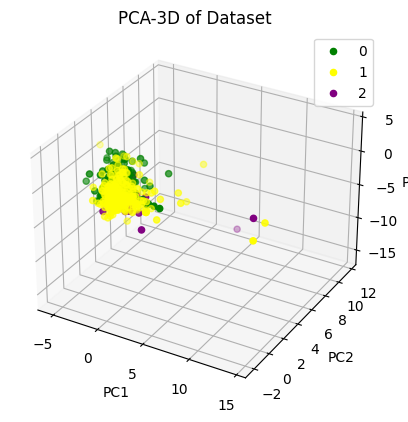

In [95]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Colorize
for color, i , j in zip(colors, range(len(D_prime)) , target_names):
    ax.scatter3D(D_prime[Class == i, 0], D_prime[Class == i, 1], D_prime[Class == i, 2] , color = color , label = j)

plt.legend(loc='best', shadow=False, scatterpoints=1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('PCA-3D of Dataset')
plt.show()

### KPCA

In [96]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
D_standardized = scaler.fit_transform(D)

In [97]:
# Compute the kernel matrix
Sigma = np.sum(eig_values)

n_samples = D_standardized.shape[0]
kernel_matrix = np.zeros((n_samples, n_samples))
for i in range(n_samples):
    for j in range(n_samples):
        kernel_matrix[i, j] = np.exp(-pow(np.linalg.norm(D_standardized[i] - D_standardized[j]),2) / (2*(Sigma**2)))


# Centerized the kernel matrix
one_n = np.ones((n_samples, n_samples)) / n_samples
kernel_matrix_centered = np.dot(np.dot((np.identity(n_samples)- one_n) , kernel_matrix) , (np.identity(n_samples)-one_n))

# Compute the eigenvectors and eigenvalues of the centered kernel matrix
eig_values, eig_vectors = np.linalg.eig(kernel_matrix_centered)
sorted_indices = np.argsort(eig_values)[::-1]
sorted_eig_values = eig_values[sorted_indices]
sorted_eig_vectors = eig_vectors[:, sorted_indices]

# Dimension
d_prime = 2

first_r_eigenvectors = sorted_eig_vectors[:, :d_prime]
first_r_eigenvalues_sqrt = np.sqrt(sorted_eig_values[:d_prime])

C = first_r_eigenvectors / first_r_eigenvalues_sqrt
projected_data = kernel_matrix_centered.dot(C)

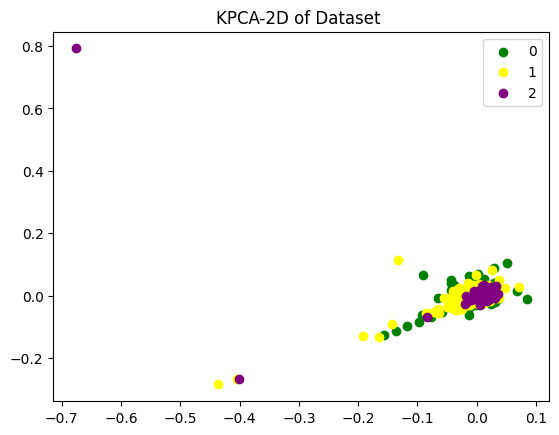

In [98]:
plt.figure()

for color, i , j in zip(colors, [0, 1, 2] , target_names):
    plt.scatter(projected_data[Class == i, 0], projected_data[Class == i, 1] , color = color , label = j)
plt.title('KPCA-2D of Dataset ')
plt.legend(loc='best', shadow=False, scatterpoints=1)

In [99]:
# Dimension
d_prime = 3

# Choose eigen values and eigenvectors 
first_r_eigenvectors = sorted_eig_vectors[:, :d_prime]
first_r_eigenvalues_sqrt = np.sqrt(sorted_eig_values[:d_prime])

# Create Matrix C
C = first_r_eigenvectors / first_r_eigenvalues_sqrt

# Project Data in new Dimension
projected_data = kernel_matrix_centered.dot(C)

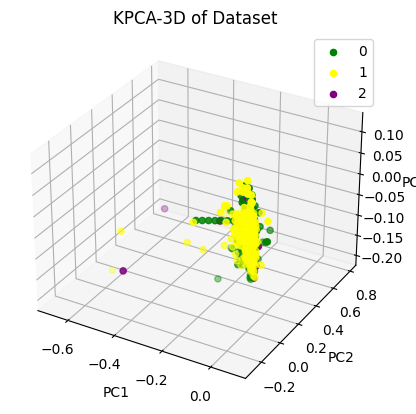

In [100]:
# Plot the Result in 3-D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for color, i , j in zip(colors, range(len(D_prime)) , target_names):
    ax.scatter(projected_data[Class == i, 0], projected_data[Class == i, 1], projected_data[Class == i, 2] , c = color , label = j)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('KPCA-3D of Dataset')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.show()

# Rotate the Plot 
elevation = +60  
azimuth = -40    
ax.view_init(elev=elevation, azim=azimuth)

### LDA

In [101]:
# DEcomposiotion Data Set
D_0 = df[df['class']== 0]
D_1 = df[df['class']== 1]
D_2 = df[df['class']== 2]

D_0 = D_0.drop(['class'], axis=1)
D_1 = D_1.drop(['class'], axis=1)
D_2 = D_2.drop(['class'], axis=1)

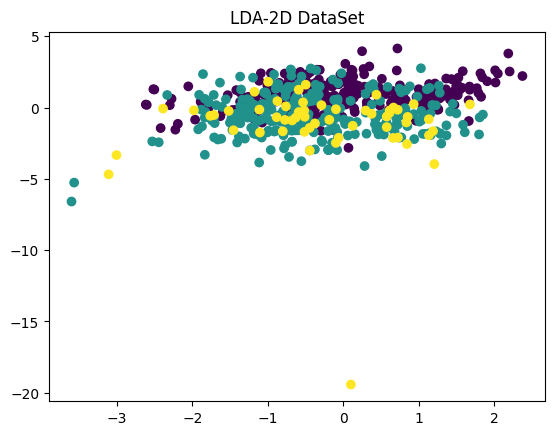

In [102]:
# Compute D_bar for Each Class
D0_bar = D_0 - np.mean(D_0, axis=0) # Mean Remove D_0
D1_bar = D_1 - np.mean(D_1, axis=0) # Mean Remove D_1
D2_bar = D_2 - np.mean(D_2, axis=0) # Mean Remove D_2

# Mean Vector
mu = np.array([D.mean()])
mu_0 = np.array([D_0.mean()])
mu_1 = np.array([D_1.mean()])
mu_2 = np.array([D_2.mean()])

# Compute The Between Scatter Matrix
S_B = (len(D_0)*((mu_0-mu)*(mu_0-mu).T)) + (len(D_1)*((mu_1-mu)*(mu_1-mu).T)) +(len(D_2)*((mu_2-mu)*(mu_2-mu).T))

# Compute The Witheen Scatter Matrix
S_w = (np.dot(D0_bar.T,D0_bar)) + (np.dot(D1_bar.T,D1_bar)) + (np.dot(D2_bar.T,D2_bar))

# EigenValues and EigenVectors and dim=2
B = np.linalg.inv(S_w) * S_B
eig_values, eig_vectors = np.linalg.eig(B)
sorted_indices = np.argsort(eig_values)[::-1]
sorted_eig_values = eig_values[sorted_indices]
sorted_eig_vectors = eig_vectors[:, sorted_indices]

# Compute Vector W in dim = 2
W = sorted_eig_vectors[:, :2]
W = pd.DataFrame(W , columns=[0,1])

# Map the Data set 
mapped_D=np.dot(D,W)

#Plot Data set
fig = plt.figure()
ax0 = fig.add_subplot(111)
plt.title('LDA-2D DataSet')
plt.scatter(mapped_D[:,0],mapped_D[:,1] ,c = Class )

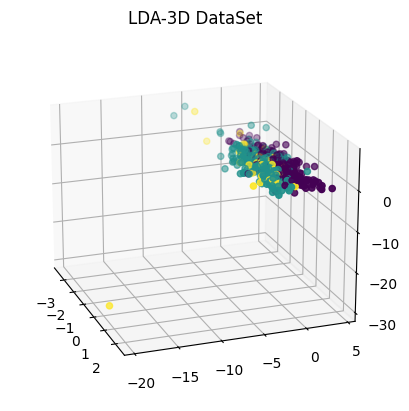

In [103]:
# Compute Vector W in dim = 2
W = sorted_eig_vectors[:, :3]
W = pd.DataFrame(W , columns=[0,1,2])

# Map the Data set 
mapped_D=np.dot(D,W)

#Plot Data set
fig = plt.figure()
ax0 = fig.add_subplot(111,projection='3d')
plt.title('LDA-3D DataSet')
ax0.scatter(mapped_D[:,0],mapped_D[:,1],mapped_D[:,2],c=Class)

# Rotate the Plot 
elevation = 20  
azimuth = -20   
ax0.view_init(elev=elevation, azim=azimuth)

# A - 3

### Dimension For PCA

In [104]:
alpha = 0.9

eig_values, eig_vectors = np.linalg.eig(Cov_Matrix)  # EigenValues and EigenVectors
sorted_indices = np.argsort(eig_values)[::-1] 
sorted_eig_values = eig_values[sorted_indices]

Var_D = np.sum(sorted_eig_values)

f_r = 0 
for i in range(len(sorted_eig_values)):
    f_r =  (f_r + sorted_eig_values[i]) / Var_D
    if f_r >= alpha:
        break
print("The Best Dimension For PCA is: " , i)

The Best Dimension For PCA is:  24


### Dimension For KPCA

In [105]:
eig_values, eig_vectors = np.linalg.eig(kernel_matrix_centered)  # EigenValues and EigenVectors
sorted_indices = np.argsort(eig_values)[::-1] 
sorted_eig_values = eig_values[sorted_indices]

landa = 1/np.sqrt(sorted_eig_values[:-2])

f_r = 0 
for i in range(len(landa)):
    f_r =  (f_r + landa[i]) / np.sum(landa)
    if f_r >= alpha:
        d_prime = i
        break
print("The Best Dimension For KPCA is: " , d_prime)

The Best Dimension For KPCA is:  3


### Dimension For LDA

In [106]:
eig_values, eig_vectors = np.linalg.eig(B)
sorted_indices = np.argsort(eig_values)[::-1]
sorted_eig_values = eig_values[sorted_indices]

Var_D = np.sum(sorted_eig_values)

f_r = 0 
for i in range(len(sorted_eig_values)):
    f_r =  (f_r + sorted_eig_values[i]) / Var_D
    if f_r >= alpha:
        break
print("The Best Dimension For LDA is: " , i)

The Best Dimension For LDA is:  24


# A - 4

In [107]:
# Read Data
df = pd.read_excel(r'F:\darsi\401-02\Algorithem\Dr.Ghahremani\Tamrin\Data.xlsx')
df = df.drop(['Unnamed: 25'], axis=1)

In [108]:
# Seperate Data Set
X = df.iloc[:,:-2].values
Class = df.iloc[:,-1].values

In [109]:
# Create Conditions

must_link = np.zeros(X.shape[0])
cannot_link = np.zeros(X.shape[0])

for i in range(len(df)):
    if df['weight'][i] <= 50:
        must_link[i] = 1
    if df['weight'][i] >= 150:
        cannot_link[i] = -1

#Number of Clusters
k = 3 

# Choose Center Randomly
n = np.random.choice(X.shape[0], size=k, replace=False)
initial_centers = X[n, :]

In [110]:
clusters = np.zeros(X.shape[0])
distances = np.sqrt(np.sum((X[0] - initial_centers)**2, axis=1))
cluster = np.argmin(distances)
clusters[0] = cluster 

for i in range(len(must_link)):
    if must_link[i] == 1:
        clusters[i] = clusters[0]

import random        
one_idxs = np.nonzero(cannot_link)[0][:3]
rand_list = random.sample(range(0, 3), 3)
clusters[one_idxs[0]] = rand_list[0]
clusters[one_idxs[1]] = rand_list[1]
clusters[one_idxs[2]] = rand_list[2]

In [111]:
iteration = 0
while iteration < 100:
    # Asign Sample to Clusters
    for i in range(X.shape[0]):
        if must_link[i] !=0 and cannot_link[i] == 0:
            distances = np.sqrt(np.sum((X[i] - initial_centers)**2, axis=1))
            cluster = np.argmin(distances)
            clusters[i] = cluster

            # Update Centers
            new_centers = np.zeros((k, X.shape[1]))
            for i in range(k):
                X_cluster = X[clusters == i]
                if X_cluster.shape[0] > 0:
                    new_centers[i] = np.mean(X_cluster, axis=0)
        if cannot_link[i] == -1 :
            clusters[i] = 4
    iteration +=1
    initial_centers = new_centers
print(clusters)

[0. 0. 0. 0. 0. 4. 0. 0. 0. 0. 4. 0. 0. 0. 4. 0. 0. 0. 4. 0. 0. 0. 0. 0.
 0. 4. 0. 0. 0. 0. 0. 0. 2. 0. 2. 0. 0. 1. 0. 0. 4. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 2. 0. 4. 0. 0. 0. 4. 2. 0. 4. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 4. 0. 0. 0. 0. 0. 1. 2. 0. 0. 0. 2. 0.
 0. 0. 0. 0. 0. 4. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 4. 0. 0. 0. 4. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4.
 0. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 0. 4. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 2.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 2. 0. 0. 0. 0. 4. 0. 0. 4. 0. 0. 2. 0.
 0. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 4. 0. 2. 0. 0. 0. 0. 4. 0.
 0. 0. 0. 0. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 4. 0.
 2. 0. 4. 0. 0. 0. 4. 4. 0. 0. 0. 0. 4. 0. 2. 2. 0. 0. 0. 2. 0. 0. 0. 4.
 2. 2. 2. 0. 0. 0. 0. 0. 0. 2. 0. 1. 0. 0. 0. 2. 0.

In [112]:
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(Class, clusters)
accuracy = (confusion_mat[0, 0] + confusion_mat[1, 1]) / sum(sum(confusion_mat))
print(f' Accuracy =  {accuracy * 100 :.2f} %')

 Accuracy =  39.54 %


# B

In [113]:
df = pd.read_excel(r"F:\darsi\401-02\Algorithem\Dr.Ghahremani\Tamrin\fa.xlsx" , names=['x1','x2','x3','x4','x5','x6','x7','x8','x9'])
col = df.columns
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,4,8,5,3,7,7,7,6,6
1,2,8,2,3,6,7,1,3,7
2,4,8,4,2,8,7,7,5,7
3,3,8,5,4,8,8,7,6,7
4,4,7,3,3,6,6,1,4,7


In [114]:
# Normalized DataSet
from sklearn import preprocessing
df = preprocessing.scale(df)
pd.DataFrame(df)

,0,1,2,3,4,5,6,7,8
0,0.468839,-0.156386,1.178689,-0.536418,0.281788,0.527515,0.955758,1.434069,-1.872126
1,-1.041865,-0.156386,-1.003140,-0.536418,-0.739693,0.527515,-1.489858,-1.685032,-0.443398
2,0.468839,-0.156386,0.451413,-1.400647,1.303269,0.527515,0.955758,0.394369,-0.443398
3,-0.286513,-0.156386,1.178689,0.327811,1.303269,1.139433,0.955758,1.434069,-0.443398
4,0.468839,-1.668115,-0.275863,-0.536418,-0.739693,-0.084402,-1.489858,-0.645331,-0.443398
5,0.468839,-0.156386,0.451413,-1.400647,-0.739693,-1.308238,0.140553,-0.645331,-0.443398
6,0.468839,-0.156386,-0.275863,-0.536418,0.281788,-0.696320,-0.267050,-0.645331,-0.443398
7,-1.041865,-0.156386,-1.003140,-1.400647,0.281788,-0.084402,-1.489858,-0.645331,-0.443398
8,0.468839,-0.156386,-0.275863,0.327811,1.303269,0.527515,-0.267050,-0.645331,0.985329
9,-0.286513,2.867073,1.178689,0.327811,0.281788,1.139433,0.955758,1.434069,0.985329


In [115]:
# Cov Matrix
Cov_matrix = np.dot((1/30)*(df).T,df)
pd.DataFrame(Cov_matrix)

,0,1,2,3,4,5,6,7,8
0,0.966667,-0.347816,0.161648,0.177831,-0.076271,-0.239076,-0.238167,-0.152554,-0.410589
1,-0.347816,0.966667,0.251482,0.049556,0.197019,0.018076,0.473117,0.583533,0.436935
2,0.161648,0.251482,0.966667,-0.122094,0.397067,0.111003,0.571072,0.407625,-0.360692
3,0.177831,0.049556,-0.122094,0.966667,0.057838,0.044374,0.037656,0.204495,0.346297
4,-0.076271,0.197019,0.397067,0.057838,0.966667,0.543876,0.350315,0.494395,-0.025162
5,-0.239076,0.018076,0.111003,0.044374,0.543876,0.966667,0.169433,0.286661,-0.007034
6,-0.238167,0.473117,0.571072,0.037656,0.350315,0.169433,0.966667,0.525590,0.157302
7,-0.152554,0.583533,0.407625,0.204495,0.494395,0.286661,0.525590,0.966667,0.169034
8,-0.410589,0.436935,-0.360692,0.346297,-0.025162,-0.007034,0.157302,0.169034,0.966667


In [116]:
#Compute EigenValues and EigenVectors
ev,v = np.linalg.eig(Cov_matrix)

# Sort the eigenvectors by decreasing eigenvalues
sorted_indices = np.argsort(ev)[::-1]
sorted_eig_values = eig_values[sorted_indices]
sorted_eig_vectors = v[:, sorted_indices]

In [117]:
np.mean(ev)

0.9666666666666658

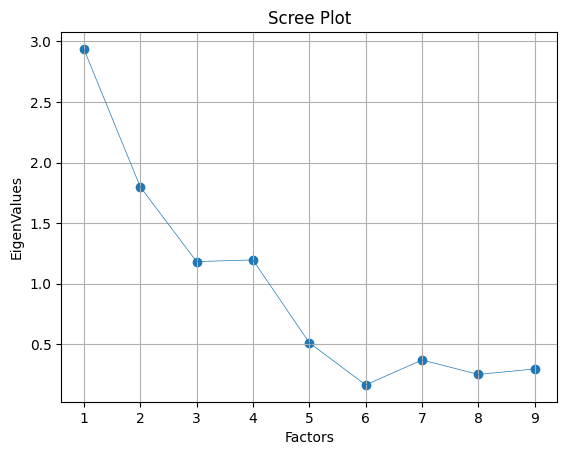

In [118]:
# Plot The Eigen Values Scatter 
xvals = range(1,df.shape[1]+1)
plt.scatter(xvals,ev,)
plt.plot(xvals,ev,linewidth=0.5,)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('EigenValues')
plt.grid()
plt.show()

با توجه به نمودار فوق و همچنین میانگین مقادیر ویژه می توان نتیجه گرفت
#### m=4

In [119]:
from math import sqrt
m = 4

# Compute Hat Matrix
new_ev = [0]*m
for i in range(m):
    new_ev[i] = sqrt(ev[i])  # type: ignore
Hat_matrix = new_ev * v[:m].T
Hat = pd.DataFrame(Hat_matrix)
Hat

,0,1,2,3
0,0.360508,-0.546152,-0.351884,-0.081955
1,-0.677648,0.357479,-0.526472,0.262765
2,0.939816,-0.144616,-0.020426,0.865571
3,-0.377216,-0.451977,-0.332568,0.048246
4,0.398825,0.590017,-0.218371,-0.306128
5,-0.128075,-0.529713,0.617600,-0.137324
6,0.364064,-0.083131,0.014096,-0.237782
7,0.536604,-0.526487,-0.480335,-0.387188
8,-0.853162,-0.485466,-0.096874,0.221332


In [120]:
# Compute Communality
hi=[0]*Hat_matrix.shape[0]

for i in range(Hat_matrix.shape[0]):
    hi[i] = sum(pow(Hat_matrix[i][:],2))

pd.DataFrame(hi , columns=['hi'])


,hi
0,0.558787
1,0.933217
2,1.653798
3,0.459504
4,0.648581
5,0.697287
6,0.196192
7,0.945768
8,1.021935


In [121]:
# Compute Psi Matrix
PSi=[0]*Hat_matrix.shape[0]
for i in range(Hat_matrix.shape[0]):
    PSi[i] = Cov_matrix[i][i] - sum(Hat_matrix[i][:]**2)
PSi = np.diag(PSi)
pd.DataFrame(PSi)

,0,1,2,3,4,5,6,7,8
0,0.407879,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.03345,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.00000,-0.687131,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.00000,0.000000,0.507162,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.00000,0.000000,0.000000,0.318086,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.00000,0.000000,0.000000,0.000000,0.269379,0.000000,0.000000,0.000000
6,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.770474,0.000000,0.000000
7,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020899,0.000000
8,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.055268


In [122]:
# An Estimate Of ،he ژovariance Matrix
S = np.dot(Hat ,Hat.T)  + PSi
pd.DataFrame(S)

,0,1,2,3,4,5,6,7,8
0,0.966667,-0.275813,0.354043,0.223930,-0.076530,0.037063,0.191177,0.681746,-0.026484
1,-0.275813,0.966667,-0.450367,0.281812,-0.024817,-0.463805,-0.346327,-0.400694,0.513759
2,0.354043,-0.450367,0.966667,-0.240597,0.028981,-0.175240,0.148070,0.255121,-0.538051
3,0.223930,0.281812,-0.240597,0.966667,-0.359263,0.075711,-0.115917,0.176608,0.584141
4,-0.076530,-0.024817,0.028981,-0.359263,0.966667,-0.456446,0.165863,0.126795,-0.673296
5,0.037063,-0.463805,-0.175240,0.075711,-0.456446,0.966667,0.038767,-0.033323,0.276203
6,0.191177,-0.346327,0.148070,-0.115917,0.165863,0.038767,0.966667,0.324421,-0.324243
7,0.681746,-0.400694,0.255121,0.176608,0.126795,-0.033323,0.324421,0.966667,-0.241384
8,-0.026484,0.513759,-0.538051,0.584141,-0.673296,0.276203,-0.324243,-0.241384,0.966667


In [123]:
# Compute Error Matrix
E = Cov_matrix - S
pd.DataFrame(E)

,0,1,2,3,4,5,6,7,8
0,0.000000,-0.072003,-0.192395,-0.046100,0.000259,-0.276138,-0.429345,-0.834301,-0.384105
1,-0.072003,0.000000,0.701849,-0.232256,0.221837,0.481881,0.819444,0.984227,-0.076824
2,-0.192395,0.701849,0.000000,0.118502,0.368086,0.286243,0.423002,0.152505,0.177359
3,-0.046100,-0.232256,0.118502,0.000000,0.417102,-0.031337,0.153573,0.027887,-0.237844
4,0.000259,0.221837,0.368086,0.417102,0.000000,1.000323,0.184453,0.367601,0.648134
5,-0.276138,0.481881,0.286243,-0.031337,1.000323,0.000000,0.130666,0.319984,-0.283237
6,-0.429345,0.819444,0.423002,0.153573,0.184453,0.130666,0.000000,0.201169,0.481545
7,-0.834301,0.984227,0.152505,0.027887,0.367601,0.319984,0.201169,0.000000,0.410418
8,-0.384105,-0.076824,0.177359,-0.237844,0.648134,-0.283237,0.481545,0.410418,0.000000


In [124]:
# Comput B Matrix
B = np.dot(np.linalg.inv(S) , Hat)
pd.DataFrame(B)

,0,1,2,3
0,-0.281249,0.291515,0.078779,-0.991100
1,0.090677,0.770097,-0.927538,0.306154
2,1.012949,-0.830888,-0.340952,3.011807
3,-0.034173,0.171291,0.003552,-0.328862
4,0.417833,-0.656634,-0.224070,1.761801
5,0.324901,-0.084095,0.047666,0.558961
6,0.058913,-0.087335,-0.019341,0.212684
7,0.461369,-0.653713,-0.856803,0.180987
8,-0.020855,-2.095349,-0.187140,3.098151


In [125]:
# Comput Factors Matrix
F = np.dot(df,B)
pd.DataFrame(F)

,0,1,2,3
0,2.112357,1.617421,-1.156640,-1.332143
1,-1.712580,2.919525,2.149514,-4.864027
2,1.322523,-0.911084,-0.517181,2.799540
3,2.891092,-2.170621,-1.680164,5.700373
4,-1.256976,0.963249,2.502761,-4.787557
5,-0.655244,1.335634,0.759668,-2.187421
6,-0.819862,1.401353,0.818872,-2.607055
7,-0.975365,1.472545,0.997575,-2.934033
8,-0.054758,-2.217952,0.384022,4.018870
9,2.708644,-2.165209,-4.523025,9.252784


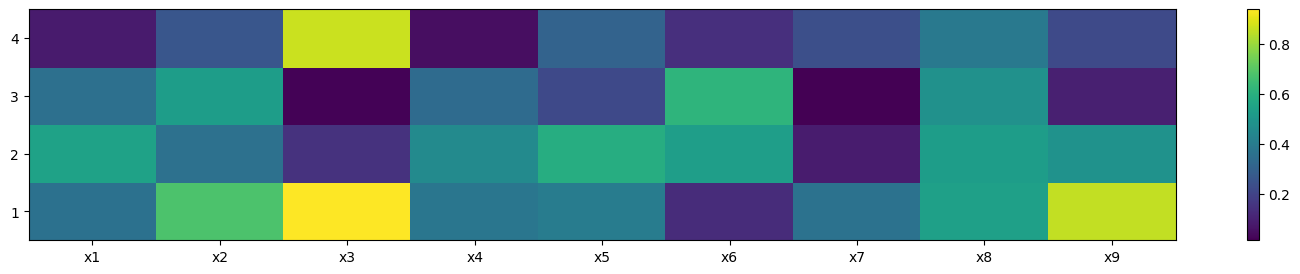

In [126]:
# Plot the Loadings against Features

z=np.abs(Hat.T)
fig,ax = plt.subplots()
c=ax.pcolor(z)
fig.colorbar(c,ax=ax)

fig.set_size_inches(18.5,3)
fig.set_dpi(100)

ax.set_yticks(np.arange(Hat.T.shape[0])+0.5, minor = False)
ax.set_xticks(np.arange(Hat.T.shape[1])+0.5, minor = False)

ax.set_yticklabels(np.arange(Hat.T.shape[0])+1)
ax.set_xticklabels(col)
plt.show()

# C

### C-1

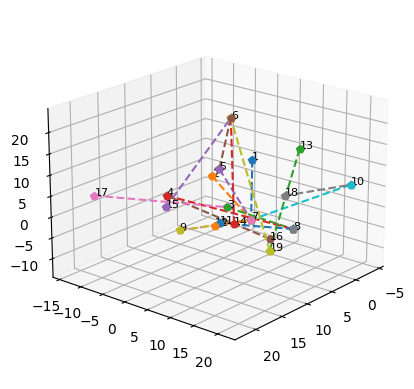

In [127]:
data = pd.read_excel(r'F:\darsi\401-02\Algorithem\Dr.Ghahremani\Tamrin\graph.xlsx' , names=['x','y','z','edge'])

X = data.iloc[:, :3].values
vertices = data.iloc[:, 3].values

# Create 3D Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

color = [ i for i in range(len(X))]
for index, row in data.iterrows():
    ax.scatter(row['x'], row['y'], row['z'] )
    x1, y1, z1 = row['x'], row['y'], row['z']
    ax.text(x1, y1, z1, str(index + 1), fontsize=8)
    l = row['edge']
    x2, y2, z2 = data['x'][l-1] , data['y'][l-1] , data['z'][l-1]
    ax.plot([x1, x2], [y1, y2], [z1, z2], 'p--')

# Rotate the Plot 
elevation = 20  
azimuth = 40    
ax.view_init(elev=elevation, azim=azimuth)

plt.show()

In [128]:
vertices.shape

(19,)

In [129]:
vertices

array([ 7,  7,  8,  8,  7,  5,  9,  8,  7,  7,  8,  7, 19,  6,  6,  4,  3,
       10,  6], dtype=int64)

In [130]:
adjacency_matrix = np.zeros((X.shape[0],X.shape[0]))

for i in range(X.shape[0]):
    adjacency_matrix[i-1 , vertices[i]-1] = 1
    adjacency_matrix[vertices[i]-1 ,i ] = 1

pd.DataFrame(adjacency_matrix.astype('int32'))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1
6,1,1,0,0,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0
7,0,0,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [131]:
n_clusters = 3

# Compute Laplasian Matrix
degree_matrix = np.diag(np.sum(adjacency_matrix, axis=1))
laplacian_matrix = degree_matrix - adjacency_matrix

# Compute EigenValues
eigenvalues, eigenvectors = np.linalg.eig(laplacian_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Compute Matrix U
U = eigenvectors[:,-n_clusters:]

# Normalized the row
Y = np.zeros((19,3))
for i in range(len(U)):
    Y[i,:] =  U[i,:] / np.linalg.norm(U[i,:])

# K-means On Y with 3-clusters

# ُSelect Centroids
initial_centroids = Y[np.random.choice(Y.shape[0], 3, replace=False)]

def k_means(Y, initial_centroids, max_iterations=100):
    centroids = initial_centroids.copy()
    for _ in range(max_iterations):
        # Calculate and Assign
        distances = np.linalg.norm(Y[:, np.newaxis] - centroids, axis=2)
        cluster_assignments = np.argmin(distances, axis=1)

        # Update Centroids
        new_centroids = np.array([Y[cluster_assignments == i].mean(axis=0) for i in range(len(centroids))])
        
        centroids = new_centroids

    return centroids, cluster_assignments

centroids, cluster_assignments = k_means(Y, initial_centroids)

print("Cluster Assignments:\n", cluster_assignments)

Cluster Assignments:
 [1 1 1 1 0 1 1 1 0 2 1 2 0 2 2 1 0 0 0]


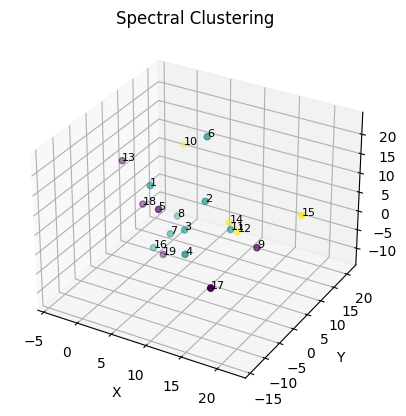

In [132]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(data['x'], data['y'], data['z'], c = cluster_assignments )
for index, row in data.iterrows():
    x1, y1, z1 = row['x'], row['y'], row['z']
    ax.text(x1, y1, z1, str(index + 1), fontsize=8)
    
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Spectral Clustering')
plt.show()

### C-2

In [137]:
# Compute Gaussian Matrix
n_samples = X.shape[0]
kernel_matrix = np.zeros((n_samples, n_samples))
for i in range(n_samples):
    for j in range(n_samples):
        if adjacency_matrix[i,j] == 1:
            kernel_matrix[i, j] = np.exp(-pow(np.linalg.norm(X[i] - X[j]),2) / (2*(Sigma**2)))
pd.DataFrame(kernel_matrix.astype('float32'))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.915166,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.842999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.936495,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.810702,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.901969,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.823387,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,1.000000,0.851486,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.741555,0.000000,0.000000,0.000000,0.000000,0.762266,0.83251,0.000000,0.000000,0.000000,0.528041
6,0.915166,0.900615,0.000000,0.000000,0.923916,0.000000,0.000000,0.973317,0.911050,0.817634,0.000000,0.950673,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.936495,0.796614,0.000000,0.000000,0.973317,1.000000,0.000000,0.000000,0.927626,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.911050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.889409,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.884522,0.000000


In [134]:
n_clusters = 3

# Compute Laplasian Matrix
degree_matrix = np.diag(np.sum(kernel_matrix, axis=1))
laplacian_matrix = degree_matrix - kernel_matrix

# Compute EigenValues
eigenvalues, eigenvectors = np.linalg.eig(laplacian_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Compute Matrix U
U = eigenvectors[:,-n_clusters:]

# Normalized the row
Y = np.zeros((sorted_eigenvectors.shape[0],n_clusters))
for i in range(len(U)):
    Y[i,:] =  U[i,:] / np.linalg.norm(U[i,:])

# K-means On Y with 3-clusters

# ُSelect Centroids
initial_centroids = Y[np.random.choice(Y.shape[0], n_clusters, replace=False)]
centroids, cluster_assignments = k_means(Y, initial_centroids)

print("Cluster Assignments:\n", cluster_assignments)

Cluster Assignments:
 [0 2 1 0 0 1 0 0 0 0 0 0 0 0 2 1 1 0 0]


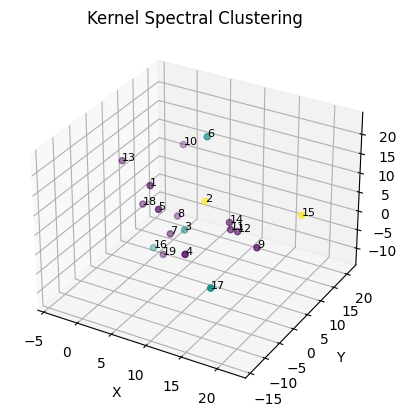

In [135]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(data['x'], data['y'], data['z'], c = cluster_assignments)

for index, row in data.iterrows():
    x1, y1, z1 = row['x'], row['y'], row['z']
    ax.text(x1, y1, z1, str(index + 1), fontsize=8)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Kernel Spectral Clustering')
plt.show()